# <center> Fetch Rewards - Coding Exercise </center>
<center> Sep 2022, Yufan Li </center>

### Table of Contents

* [Review unstructured JSON data](#chapter1)
    * [Import Packages](#section_1_1)
    * [Read Users data](#section_1_2)
    * [Read Brands data](#section_1_3)
    * [Read Receipts data](#section_1_4)        
* [Diagram a New Structured Relational Data Model](#chapter2)
* [Write a query that directly answers a predetermined question](#chapter3)
* [Evaluate Data Quality Issues](#chapter4)
    * [identify Missing value](#section_4_1) 
    * [Identify Duplicates](#section_4_2)
    * [Identify Invalid Column types](#section_4_3)  
* [Communicate with Stakeholders](#chapter5)


# Review unstructured JSON data<a class="anchor" id="chapter1"></a>

## Import Packages<a class="anchor" id="section_1_1"></a>

In [1]:
from datetime import datetime
import pandas as pd
import json
import gzip
import numpy as np
from ast import literal_eval
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

## Read Users data<a class="anchor" id="section_1_2"></a>

In [2]:
#use .decode() to convert bytes into a string, use json.loads to 
#parse a valid JSON string and convert it into a Python Dictionary
users_list=[]
with gzip.open("/Users/yufan/Downloads/users.json.gz", "r") as f:
      for line in f.readlines():
        data = json.loads(line.decode())
        users_list.append(data)
#use json_normalize to normalize Unserialized JSON objects (input list of dicts)
users=pd.json_normalize(users_list)

In [3]:
#convert the time which is stored in UTC into datetime format using the apply function
def date_converter(x):
    return(datetime.utcfromtimestamp(x/1000).strftime('%Y-%m-%d %H:%M:%S'))

In [4]:
users['createdDate.$date']=users['createdDate.$date'].apply(lambda x: date_converter(x))
users['lastLogin.$date']=users['lastLogin.$date'].apply(lambda x: 'NaN' if np.isnan(x) else date_converter(x))

In [5]:
users

,active,role,signUpSource,state,_id.$oid,createdDate.$date,lastLogin.$date
0,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04,2021-01-03 15:25:37
1,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04,2021-01-03 15:25:37
2,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04,2021-01-03 15:25:37
3,True,consumer,Email,WI,5ff1e1eacfcf6c399c274ae6,2021-01-03 15:25:30,2021-01-03 15:25:30
4,True,consumer,Email,WI,5ff1e194b6a9d73a3a9f1052,2021-01-03 15:24:04,2021-01-03 15:25:37
...,...,...,...,...,...,...,...
490,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,2014-12-19 14:21:22,2021-03-05 16:52:23
491,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,2014-12-19 14:21:22,2021-03-05 16:52:23
492,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,2014-12-19 14:21:22,2021-03-05 16:52:23
493,True,fetch-staff,NaN,NaN,54943462e4b07e684157a532,2014-12-19 14:21:22,2021-03-05 16:52:23


## Read Brands data<a class="anchor" id="section_1_3"></a>

In [6]:
brands_list=[]
with open('/Users/yufan/Downloads/brands.json', 'r') as f:
      for line in f.readlines():
        #if line.startswith('{'):
            data = json.loads(line)
            brands_list.append(data)

In [7]:
# Normalizing data
brands=pd.json_normalize(brands_list,  record_path=None,meta=[["cpg","$id","$oid"],["cpg","$ref"],["_id","$oid"],"barcode","brandCode","category","categoryCode","name","topBrand"])

In [8]:
brands

,barcode,category,categoryCode,name,topBrand,_id.$oid,cpg.$id.$oid,cpg.$ref,brandCode
0,511111019862,Baking,BAKING,test brand @1612366101024,False,601ac115be37ce2ead437551,601ac114be37ce2ead437550,Cogs,NaN
1,511111519928,Beverages,BEVERAGES,Starbucks,False,601c5460be37ce2ead43755f,5332f5fbe4b03c9a25efd0ba,Cogs,STARBUCKS
2,511111819905,Baking,BAKING,test brand @1612366146176,False,601ac142be37ce2ead43755d,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146176
3,511111519874,Baking,BAKING,test brand @1612366146051,False,601ac142be37ce2ead43755a,601ac142be37ce2ead437559,Cogs,TEST BRANDCODE @1612366146051
4,511111319917,Candy & Sweets,CANDY_AND_SWEETS,test brand @1612366146827,False,601ac142be37ce2ead43755e,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1612366146827
...,...,...,...,...,...,...,...,...,...
1162,511111116752,Baking,BAKING,test brand @1601644365844,NaN,5f77274dbe37ce6b592e90c0,5f77274dbe37ce6b592e90bf,Cogs,NaN
1163,511111706328,Breakfast & Cereal,NaN,Dippin Dots® Cereal,NaN,5dc1fca91dda2c0ad7da64ae,53e10d6368abd3c7065097cc,Cogs,DIPPIN DOTS CEREAL
1164,511111416173,Candy & Sweets,CANDY_AND_SWEETS,test brand @1598639215217,NaN,5f494c6e04db711dd8fe87e7,5332fa12e4b03c9a25efd1e7,Cogs,TEST BRANDCODE @1598639215217
1165,511111400608,Grocery,NaN,LIPTON TEA Leaves,False,5a021611e4b00efe02b02a57,5332f5f6e4b03c9a25efd0b4,Cogs,LIPTON TEA Leaves


## Read Receipts data<a class="anchor" id="section_1_4"></a>

In [9]:
receipts_list=[]
with open('/Users/yufan/Downloads/receipts.json', 'r') as f:
      for line in f.readlines():
            data = json.loads(line)
            receipts_list.append(data)

In [10]:
# Normalizing data
receipts=pd.json_normalize(receipts_list)

In [11]:
receipts['createDate.$date']=receipts['createDate.$date'].apply(lambda x: 'NaN' if np.isnan(x) else date_converter(x))
receipts['dateScanned.$date']=receipts['dateScanned.$date'].apply(lambda x: 'NaN' if np.isnan(x) else date_converter(x))
receipts['finishedDate.$date']=receipts['finishedDate.$date'].apply(lambda x: 'NaN' if np.isnan(x) else date_converter(x))
receipts['modifyDate.$date']=receipts['modifyDate.$date'].apply(lambda x: 'NaN' if np.isnan(x) else date_converter(x))
receipts['pointsAwardedDate.$date']=receipts['pointsAwardedDate.$date'].apply(lambda x: 'NaN' if np.isnan(x) else date_converter(x))
receipts['purchaseDate.$date']=receipts['purchaseDate.$date'].apply(lambda x: 'NaN' if np.isnan(x) else date_converter(x))

In [12]:
#Transform each element of a list-like to a row, replicating index values.
receipts=receipts.explode('rewardsReceiptItemList')
receipts= receipts.fillna({'rewardsReceiptItemList':'{}'})
# literal_eval converted the string of brackets and curly braces into lists of dictionary objects
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(lambda x:str(x))
receipts['rewardsReceiptItemList'] = receipts['rewardsReceiptItemList'].apply(literal_eval)

In [13]:
# Normalizing data
rewardsReceiptItemList_df=pd.json_normalize(receipts['rewardsReceiptItemList'])

In [14]:
receipts.drop('rewardsReceiptItemList', axis=1,inplace=True)
receipts.reset_index(inplace=True)
receipts=pd.concat([receipts,rewardsReceiptItemList_df],axis=1)
receipts.drop('index', axis=1,inplace=True)

In [19]:
pd.set_option('max_columns', None)
receipts

,bonusPointsEarned,bonusPointsEarnedReason,pointsEarned,purchasedItemCount,rewardsReceiptStatus,totalSpent,userId,_id.$oid,createDate.$date,dateScanned.$date,finishedDate.$date,modifyDate.$date,pointsAwardedDate.$date,purchaseDate.$date,barcode,description,finalPrice,itemPrice,needsFetchReview,partnerItemId,preventTargetGapPoints,quantityPurchased,userFlaggedBarcode,userFlaggedNewItem,userFlaggedPrice,userFlaggedQuantity,needsFetchReviewReason,pointsNotAwardedReason,pointsPayerId,rewardsGroup,rewardsProductPartnerId,userFlaggedDescription,originalMetaBriteBarcode,originalMetaBriteDescription,brandCode,competitorRewardsGroup,discountedItemPrice,originalReceiptItemText,itemNumber,originalMetaBriteQuantityPurchased,pointsEarned,targetPrice,competitiveProduct,originalFinalPrice,originalMetaBriteItemPrice,deleted,priceAfterCoupon,metabriteCampaignId
0,500.0,"Receipt number 2 completed, bonus point schedu...",500.0,5.0,FINISHED,26.00,5ff1e1eacfcf6c399c274ae6,5ff1e1eb0a720f0523000575,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:31,2021-01-03 15:25:36,2021-01-03 15:25:31,2021-01-03 00:00:00,4011,ITEM NOT FOUND,26.00,26.00,False,1,True,5.0,4011,True,26.00,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,2021-01-02 15:24:43,4011,ITEM NOT FOUND,1,1,NaN,1,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,150.0,"Receipt number 5 completed, bonus point schedu...",150.0,2.0,FINISHED,11.00,5ff1e194b6a9d73a3a9f1052,5ff1e1bb0a720f052300056b,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:43,2021-01-03 15:24:48,2021-01-03 15:24:43,2021-01-02 15:24:43,028400642255,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,10.00,10.00,True,2,True,1.0,028400642255,True,10.00,1.0,USER_FLAGGED,Action not allowed for user and CPG,5332f5fbe4b03c9a25efd0ba,DORITOS SPICY SWEET CHILI SINGLE SERVE,5332f5fbe4b03c9a25efd0ba,DORITOS TORTILLA CHIP SPICY SWEET CHILI REDUCE...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5.0,All-receipts receipt bonus,5,1.0,REJECTED,10.00,5ff1e1f1cfcf6c399c274b0b,5ff1e1f10a720f052300057a,2021-01-03 15:25:37,2021-01-03 15:25:37,NaN,2021-01-03 15:25:42,NaN,2021-01-03 00:00:00,NaN,NaN,NaN,NaN,False,1,True,NaN,4011,True,26.00,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,All-receipts receipt bonus,5.0,4.0,FINISHED,28.00,5ff1e1eacfcf6c399c274ae6,5ff1e1ee0a7214ada100056f,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:34,2021-01-03 15:25:39,2021-01-03 15:25:34,2021-01-03 00:00:00,4011,ITEM NOT FOUND,28.00,28.00,False,1,True,4.0,4011,True,28.00,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7376,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603d0b710a720fde1000042a,2021-03-01 15:42:41,2021-03-01 15:42:41,NaN,2021-03-01 15:42:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7377,NaN,NaN,NaN,NaN,SUBMITTED,NaN,5fc961c3b8cfca11a077dd33,603cf5290a720fde10000413,2021-03-01 14:07:37,2021-03-01 14:07:37,NaN,2021-03-01 14:07:37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7378,25.0,COMPLETE_NONPARTNER_RECEIPT,25.0,2.0,REJECTED,34.96,5fc961c3b8cfca11a077dd33,603ce7100a7217c72c000405,2021-03-01 13:07:28,2021-03-01 13:07:28,NaN,2021-03-01 13:07:29,NaN,2020-08-17 00:00:00,B076FJ92M4

# Diagram a New Structured Relational Data Model<a class="anchor" id="chapter2"></a>

There are three level of abstraction:Conceptual Data Model;Logical Data Model;Physical Data Model

Here I show the Conceptual Data Model, which includes all the entities and relationships. To translate to logical data model,simply add all the columns and column types into each table. Lastly,in order to translate to physical data model, some critical informaiton is missing(have annotated in the diagram)

Currently, the data model is in 1NF,which means a relation in which there is no nesting or repeating groups in tables.

In [24]:
# users.drop_duplicates().to_csv("/Users/yufan/Downloads/users.csv",index=False)
# receipts.to_csv("/Users/yufan/Downloads/receipts.csv",index=False)
# brands.to_csv("/Users/yufan/Downloads/brands.csv",index=False)

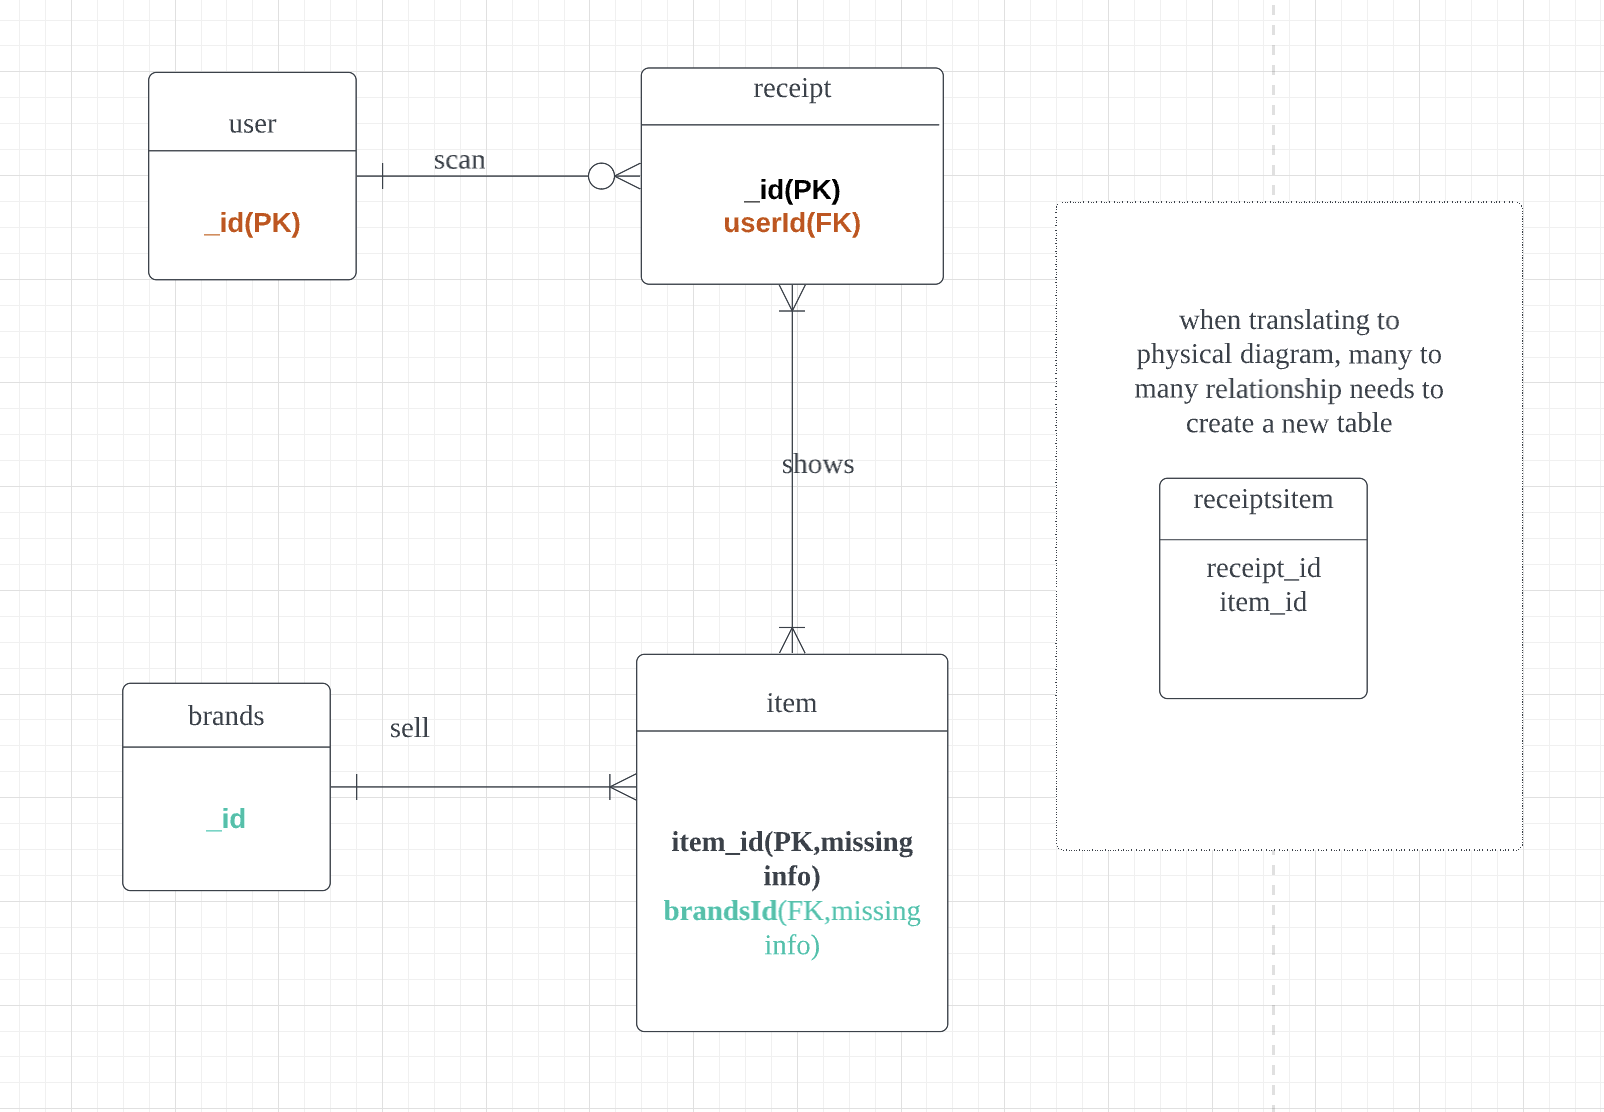

In [51]:
from IPython.display import Image
Image(filename='/Users/yufan/Desktop/erdiagram.png') 

In [65]:
users.drop_duplicates()['_id.$oid'].is_unique

True

In [63]:
#primary key should be unique,drop duplicated _id in the later steps
receipts['_id.$oid'].is_unique

False

In [64]:
brands['_id.$oid'].is_unique

True

# Write a query that directly answers a predetermined question<a class="anchor" id="chapter3"></a>


When considering average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ or ‘Rejected’, which is greater?

In [68]:
engine = create_engine('sqlite://', echo=False)
users.drop_duplicates().to_sql('users',con=engine)
receipts.drop_duplicates(subset=['_id.$oid']).to_sql('receipts',con=engine)
brands.to_sql('brands',con=engine)

In [91]:
query="""
SELECT r.rewardsReceiptStatus, avg(r.totalSpent)
FROM receipts r
where rewardsReceiptStatus='FINISHED' or rewardsReceiptStatus='REJECTED'
GROUP BY r.rewardsReceiptStatus;
"""

result=engine.execute(query)

for row in result:
    print(row)

('FINISHED', 80.85430501930502)
('REJECTED', 23.326056338028184)


assume "FINISHED" is the same as "Accepted", then average spend from receipts with 'rewardsReceiptStatus’ of ‘Accepted’ is greater

# Evaluate Data Quality Issues<a class="anchor" id="chapter4"></a>

## Identify Missing value<a class="anchor" id="section_4_1"></a>

In [73]:
# create a function to get the null value percentage
def get_null_percentage(df):
    null_count=df.isnull().sum().sort_values(ascending=True)
    null_percent = round(null_count/len(df) * 100, 2)
    return null_percent[null_percent>0]

# create a function to generate a plot that shows the percentage of null values
def null_percent_plot(df):
    null_percent = get_null_percentage(df)
    plt.figure(figsize=(10,6))
    null_percent.plot.barh()
    plt.xlabel("Null Percentage")
    plt.title("Null percentage plot")
    plt.xlim([0,100])
    plt.show()

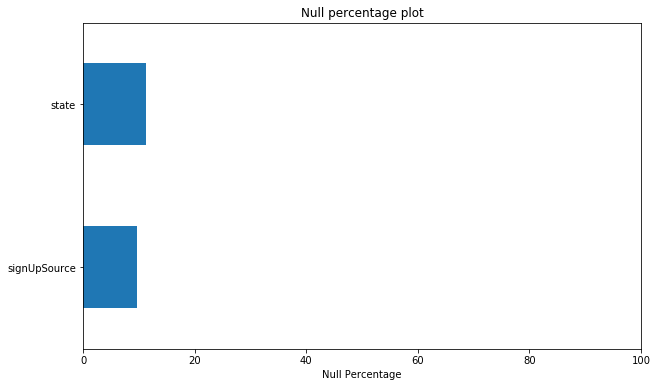

In [74]:
null_percent_plot(users)

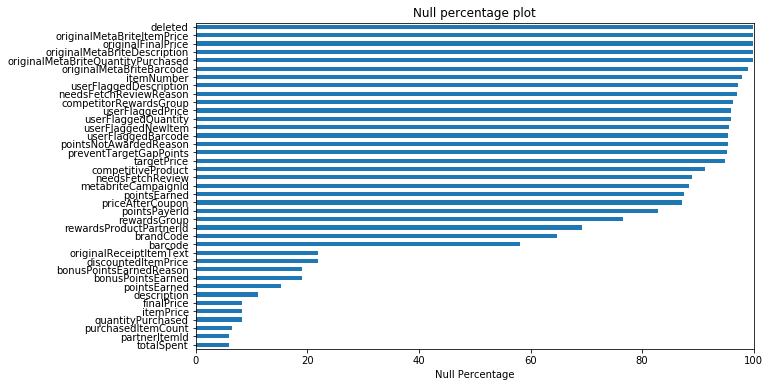

In [75]:
null_percent_plot(receipts)

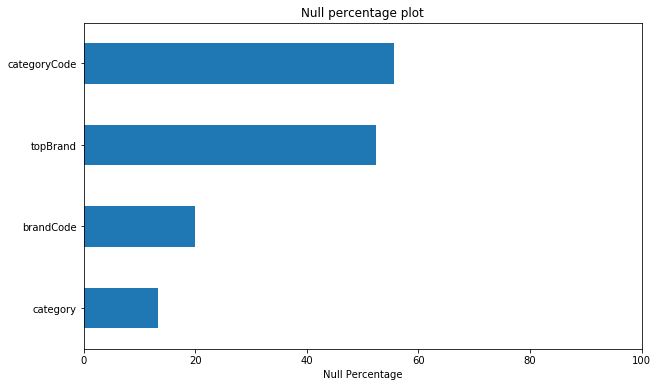

In [76]:
null_percent_plot(brands)

## Identify Duplicates<a class="anchor" id="section_4_2"></a>

In [21]:
print('Number of duplicate rows is ',len(users[users.duplicated()]))

Number of duplicate rows is  283


In [22]:
print('Number of duplicate rows is ',len(receipts[receipts.duplicated()]))

Number of duplicate rows is  0


In [23]:
print('Number of duplicate rows is ',len(brands[brands.duplicated()]))

Number of duplicate rows is  0


## Identify Invalid Column types<a class="anchor" id="section_4_3"></a>

In [77]:
receipts.dtypes
#should convert .$date from object to datetime type

bonusPointsEarned                     float64
bonusPointsEarnedReason                object
pointsEarned                           object
purchasedItemCount                    float64
rewardsReceiptStatus                   object
totalSpent                             object
userId                                 object
_id.$oid                               object
createDate.$date                       object
dateScanned.$date                      object
finishedDate.$date                     object
modifyDate.$date                       object
pointsAwardedDate.$date                object
purchaseDate.$date                     object
barcode                                object
description                            object
finalPrice                             object
itemPrice                              object
needsFetchReview                       object
partnerItemId                          object
preventTargetGapPoints                 object
quantityPurchased                 

In [78]:
users.dtypes
#should convert .$date from object to datetime type

active                 bool
role                 object
signUpSource         object
state                object
_id.$oid             object
createdDate.$date    object
lastLogin.$date      object
dtype: object

In [79]:
brands.dtypes

barcode         object
category        object
categoryCode    object
name            object
topBrand        object
_id.$oid        object
cpg.$id.$oid    object
cpg.$ref        object
brandCode       object
dtype: object

In [85]:
#containing discrepancies in the barcode from receipts table
lst=[]
for i in range(len(receipts['barcode'])):
    if type(receipts['barcode'][i])!=float:
               if (len(receipts['barcode'][i])!=12) | (not receipts['barcode'][i].isdigit()):
                   lst.append(receipts['barcode'][i])
set(lst)

{'1234',
 '20750000000',
 '21075100000',
 '21251000000',
 '22',
 '23572500000',
 '23671200000',
 '26623200000',
 '2700710686201',
 '2700719497082',
 '3283',
 '3332',
 '3435',
 '4011',
 '4023',
 '4053',
 '4060',
 '4061',
 '4066',
 '4067',
 '4068',
 '4069',
 '4072',
 '4078',
 '4090',
 '4093',
 '4131',
 '4135',
 '4166',
 '4225',
 '4540',
 '4562',
 '4563',
 '4608',
 '4614',
 '4662',
 '4759',
 '4816',
 '5000111047524',
 '94023',
 '94094',
 'B076FJ92M4',
 'B07BRRLSVC',
 'B08BGBHHP6',
 'B08DQDHR2S'}

# Communicate with Stakeholders<a class="anchor" id="chapter5"></a>

Hi all,

Recently I have been working on an analysis to answer your questions. After exploring the data, I want to discuss my findings with you.

First, I have some questions regarding joining the tables. When I drew the conceptual ER diagram, I found that to join receipts and brands tables correctly; there should be an item table derived from the rewardsReceiptItemList column. Also, the primary key and foreign key in this table are missing.


Second, I mainly identify the following data quality issues:
Primarily focus on three parts: **accuracy, completeness, consistency**<br>

● Incomplete (lacking attribute values or certain attributes of interest, or containing only
aggregate data): <br>
Some attribute values are truly missing (e.g., category code in brands table), but some attribute values are missing because I normalize JSON format data to a data frame (e.g., deleted in receipts table), which can be resolved using the NoSQL database.To deal with the truly missing value, theoretically, 25 to 30% is the maximum missing value allowed, beyond which I drop the variable from analysis if the variable is not much important in my analysis; if the null percentage is less than 5% of values, then I will delete the rows.If the null percentage is between 5% and 30%, I will impute the missing value by using the central tendency for the numeric attribute. For central tendency, I will either use median or mean depending on the distribution of the attribute.<br>

● Inaccurate(containing errors or values that deviate from the expected)or noisy or outlier:<br>
For inaccurate data, I will delete them. And I will use the quantile method to identify outliers and use a central tendency to replace outliers.<br>

● Inconsistent (e.g., containing discrepancies in some data fields):<br>
There are lots of invalid column types in these tables. And I will convert these column types. For example, for date attributes, I will convert them from object to DateTime.And there are some columns containing discrepancies. For example, in the brands table, all barcodes are digits, and length equals 12, but there are discrepancies in barcodes from the receipts table.

Regarding other data quality issues: I will delete duplicated rows.

Third, the tables can be further normalized to 2NF and even 3NF..to reduce redundancy and anomaly.

Lastly, considering the unstructured JSON format data, it is recommended to use a NoSQL database to store and query data. For performance and scaling concerns, while SQL database can only do vertical scaling, NoSQL database can do horizontal and vertical scaling, which has an advantage over SQL database when dealing with JSON data.

Please let me know if you have questions, and we can schedule a meeting to discuss them.

Thanks,

Yufan